In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0



In [3]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


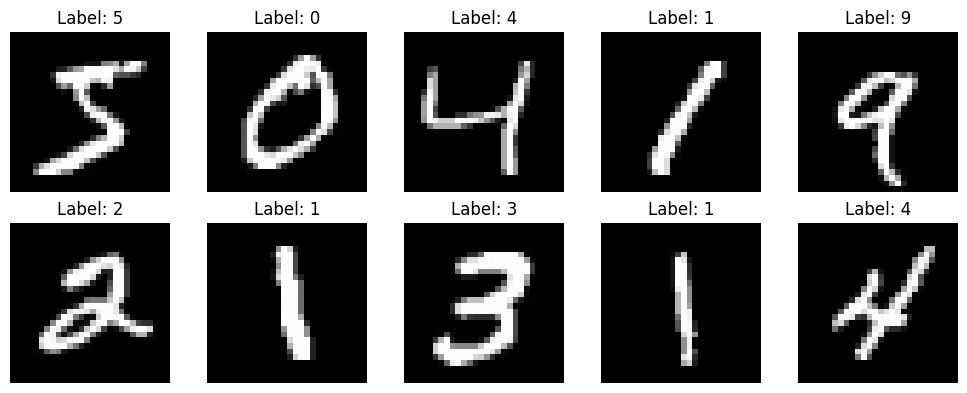

In [4]:
# Visualize a few images from the dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {tf.argmax(y_train[i]).numpy()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [7]:
# Train the model
model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.1)



Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8738 - loss: 0.4456 - val_accuracy: 0.9682 - val_loss: 0.1077
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9686 - loss: 0.1074 - val_accuracy: 0.9750 - val_loss: 0.0876
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9776 - loss: 0.0706 - val_accuracy: 0.9763 - val_loss: 0.0830
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9834 - loss: 0.0540 - val_accuracy: 0.9760 - val_loss: 0.0850
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9870 - loss: 0.0408 - val_accuracy: 0.9777 - val_loss: 0.0799
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9894 - loss: 0.0350 - val_accuracy: 0.9802 - val_loss: 0.0788
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9923 - loss: 0.0247 - val_accuracy: 0.9763 - val_loss: 0.1069
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9927 - loss: 0.021

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9736 - loss: 0.1800
Test Accuracy: 0.9783999919891357


Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9981 - loss: 0.0068 - val_accuracy: 0.9825 - val_loss: 0.1370
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9984 - loss: 0.0060 - val_accuracy: 0.9808 - val_loss: 0.1519
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9978 - loss: 0.0071 - val_accuracy: 0.9830 - val_loss: 0.1521
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9983 - loss: 0.0058 - val_accuracy: 0.9813 - val_loss: 0.1495
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9988 - loss: 0.0045 - val_accuracy: 0.9815 - val_loss: 0.1528
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9979 - loss: 0.0078 - val_accuracy: 0.9812 - val_loss: 0.1556
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9987 - loss: 0.0037 - val_accuracy: 0.9823 - val_loss: 0.1533
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9977 - loss: 0.0075 

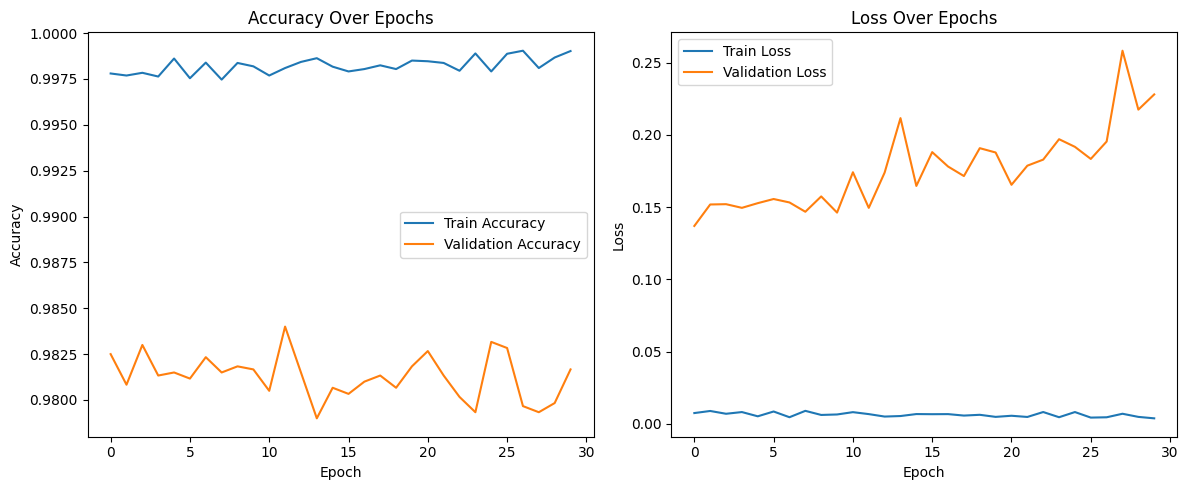

In [9]:
# Train the model and save the training history
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.1)


# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()